# Bike Rental Prediction


### Business Case :-

> * This project focuses on developing a  machine learning  model to predict daily bike rental counts based on historical usage data and contextual features such as weather conditions, temperature, humidity, seasonality, holiday indicators and working days. 

> * Accurately forecasting rental demand is essential for optimizing bike availability, preventing station overcrowding or shortages and ensuring efficient resource utilization. Without a predictive system, bike-sharing services risk operational inefficiencies, customer dissatisfaction and revenue loss due to unmet demand or underused inventory. By solving this problem, the business can make data-driven decisions to improve service quality and operational performance.

## Task 1: Prepare a complete data analysis report on the given data.

In [2]:
# Importing required libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("hour.csv")

In [4]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Basic Check

In [5]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df.info() #It gives useful summary about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
df.describe() #Gives summary statistics for numerical columns

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
df.shape #Gives the size of data 

(17379, 17)

In [12]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Removing unnecessary columns

In [13]:
df_clean = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)


In [14]:
df_clean

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [17]:
df_clean.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [19]:
df_clean.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [18]:
df_clean.duplicated().sum()

2

In [20]:
# Show duplicates
df_clean[df_clean.duplicated()]

# Drop duplicates (if found)
df_clean.drop_duplicates(inplace=True)


In [21]:
df_clean.duplicated().sum()

0

#### Exploratory Data Analysis

* Distributed in three parts:
>  **Univariate Analysis**:- Univariate analysis is essential for gaining insights of individual variables, which can help in further analysis and decision-making.
>  **Bivariate Analysis**:- Bivariate analysis is for understanding how two variables influence each other, which can help decision-making and in further analysis.
>  **Multivariate Analysis**:- Multivariate analysis is for understanding the relation of multiple factors, to get more insights and also for decision-making in complex datasets.

##### Univariate Analysis

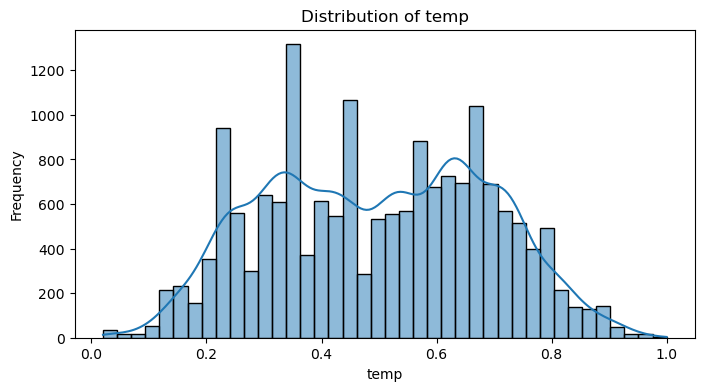

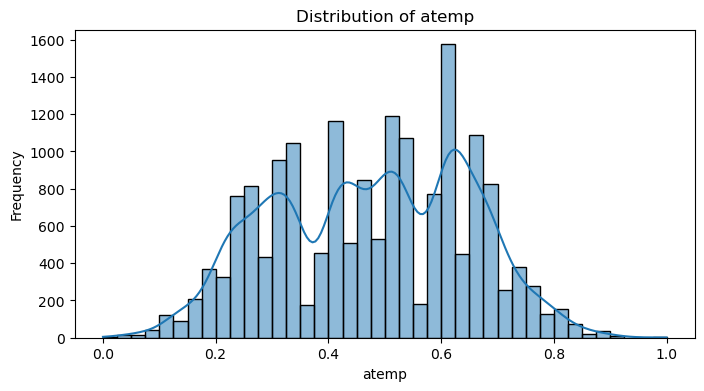

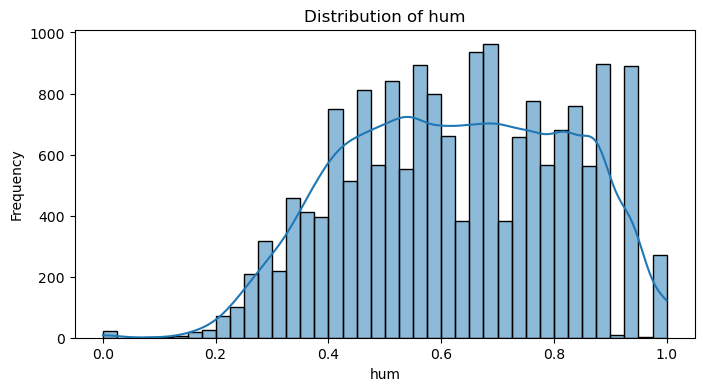

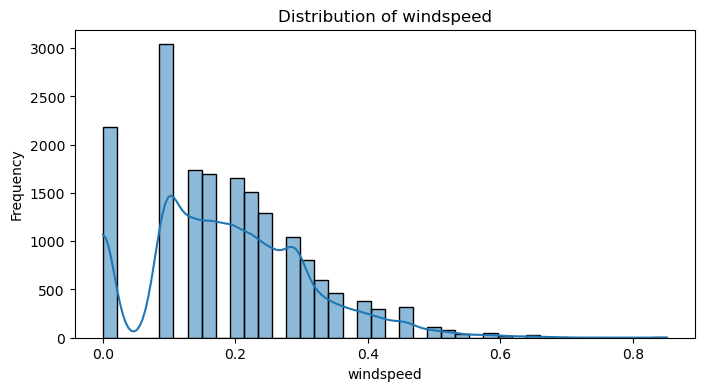

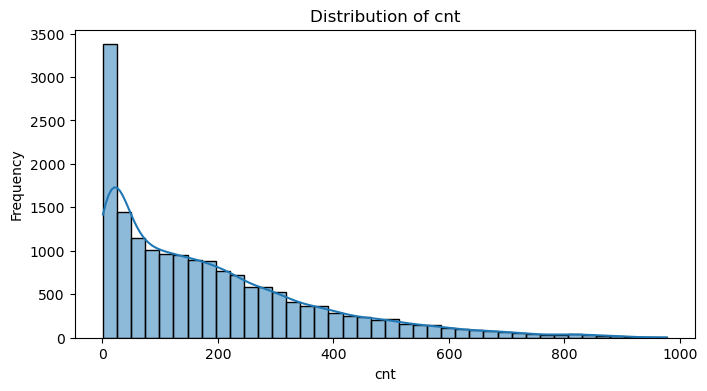

In [22]:
# For Numerical columns

numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[col], kde=True, bins=40)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


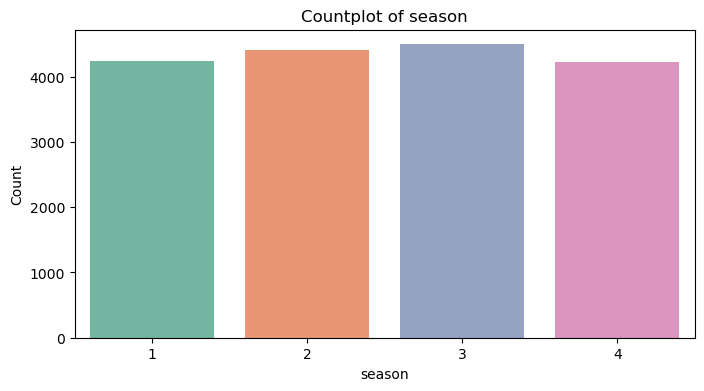

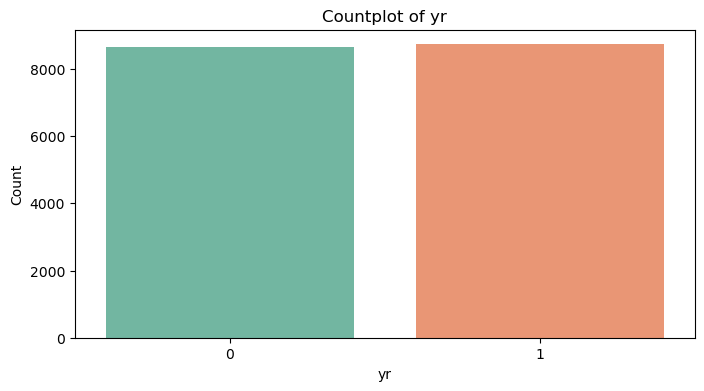

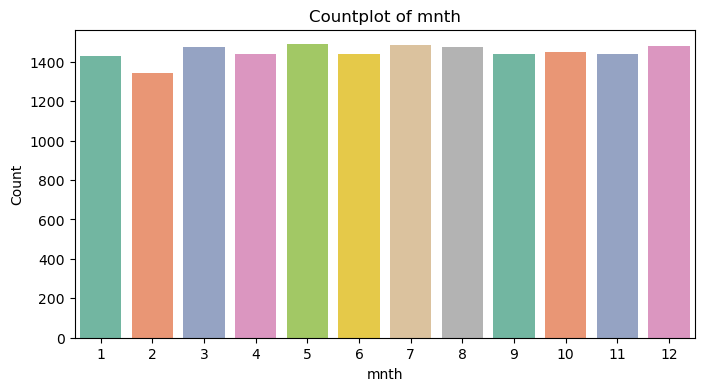

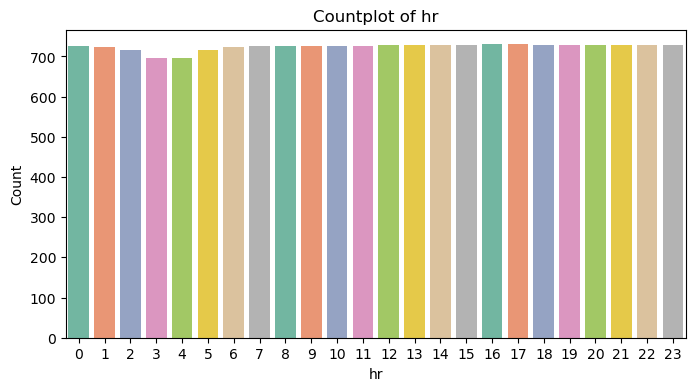

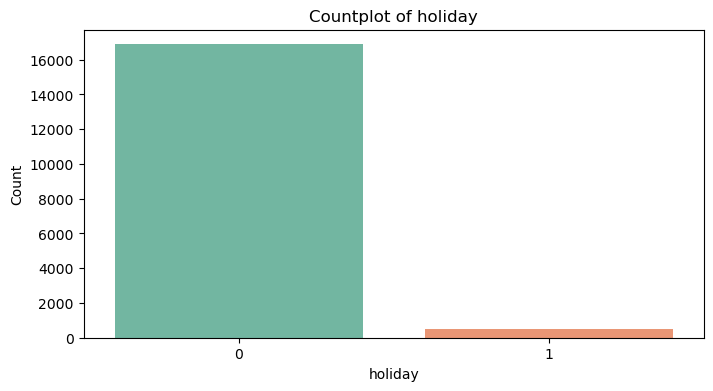

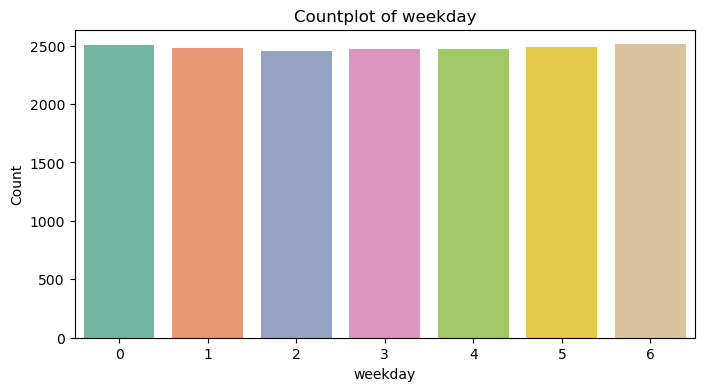

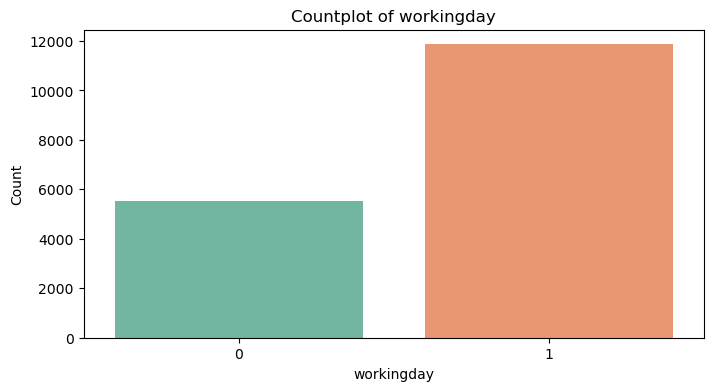

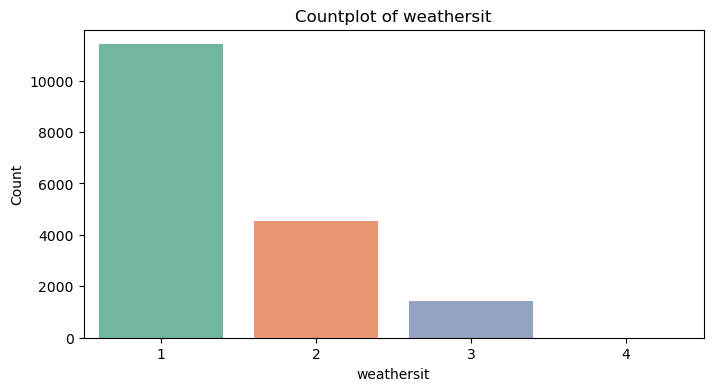

In [23]:
# For Categorical columns

categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df_clean, palette="Set2")
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


##### Bivariate Analysis

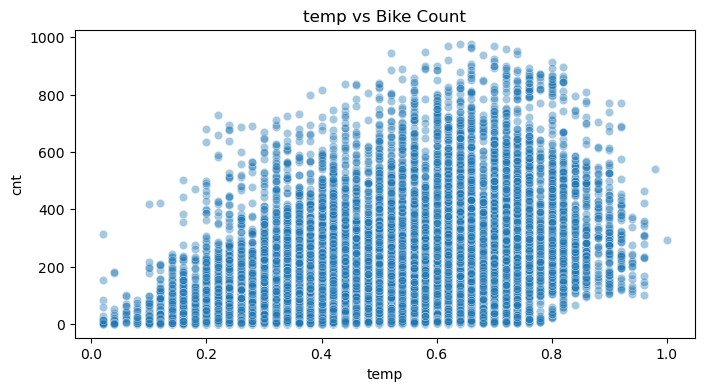

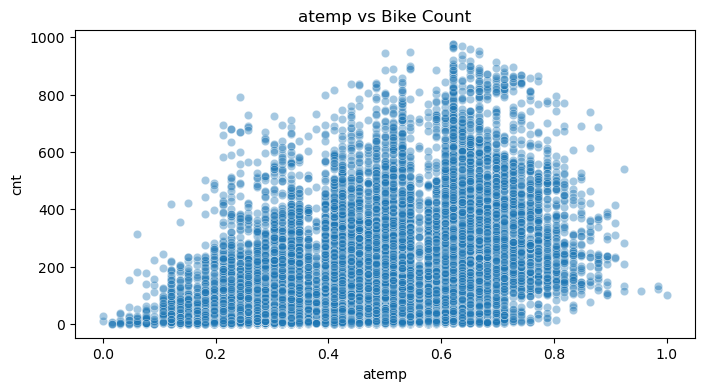

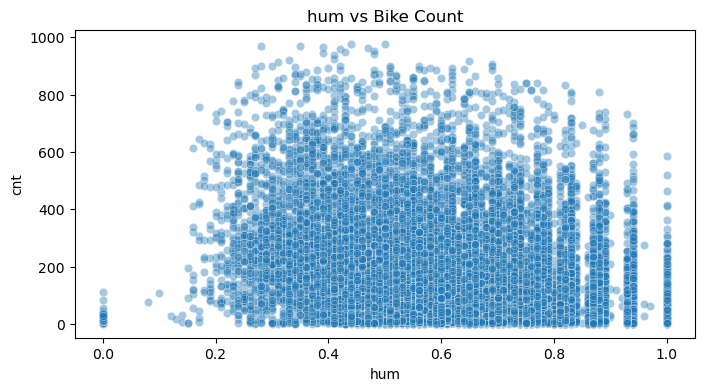

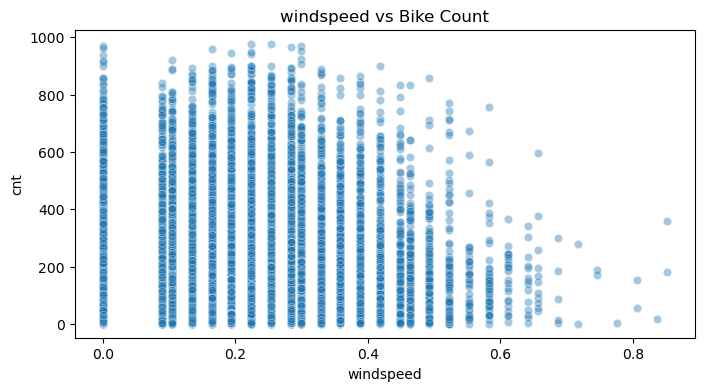

In [28]:
# Numerical vs Target (cnt)

for col in ['temp', 'atemp', 'hum', 'windspeed']:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df_clean[col], y=df_clean['cnt'], alpha=0.4)
    plt.title(f'{col} vs Bike Count')
    plt.xlabel(col)
    plt.ylabel('cnt')
    plt.show()


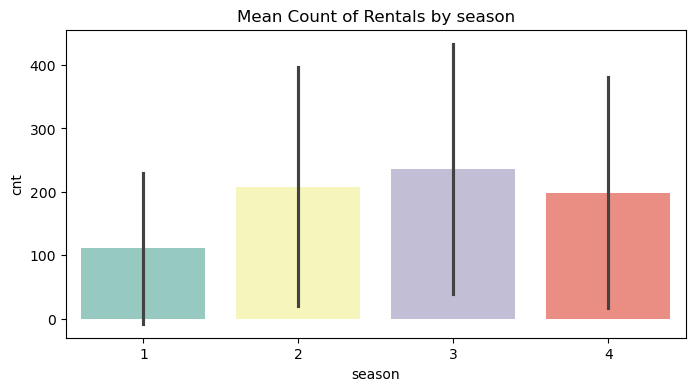

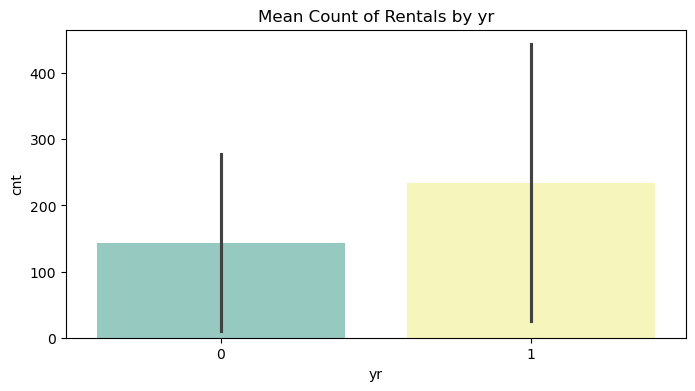

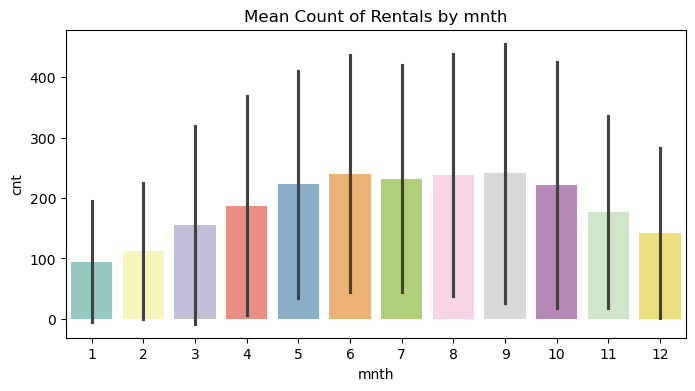

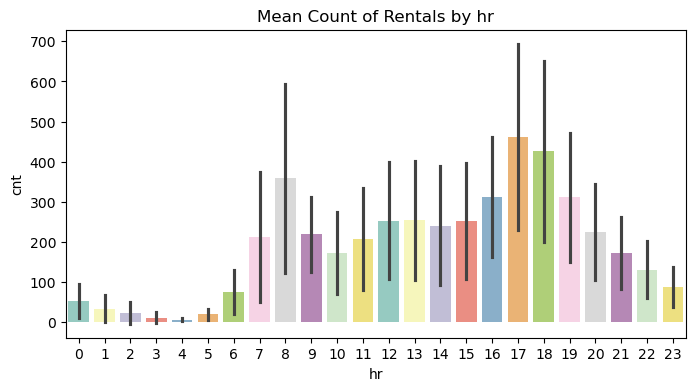

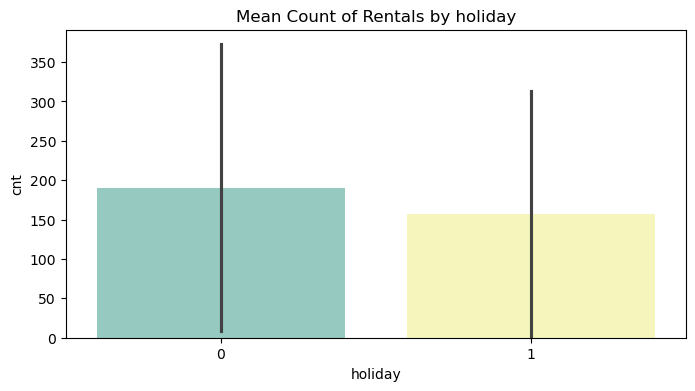

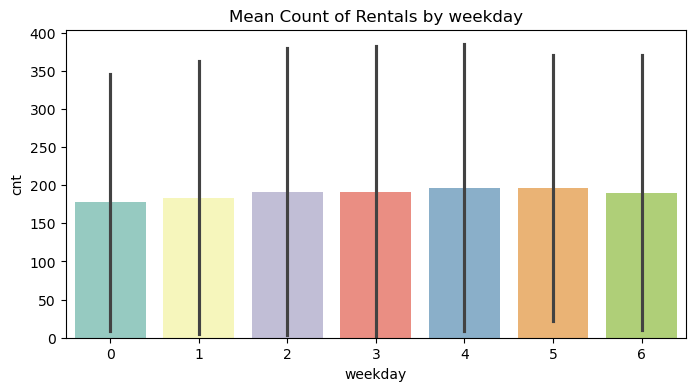

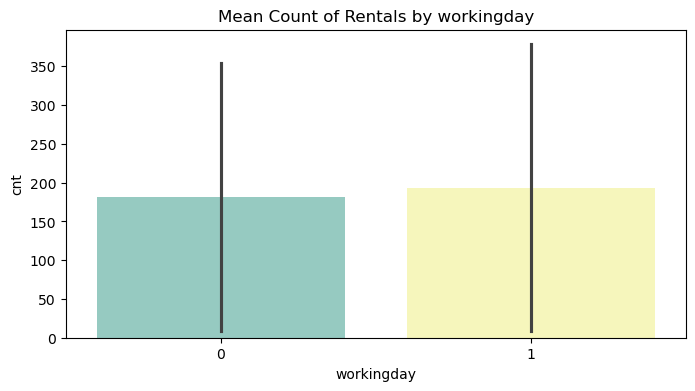

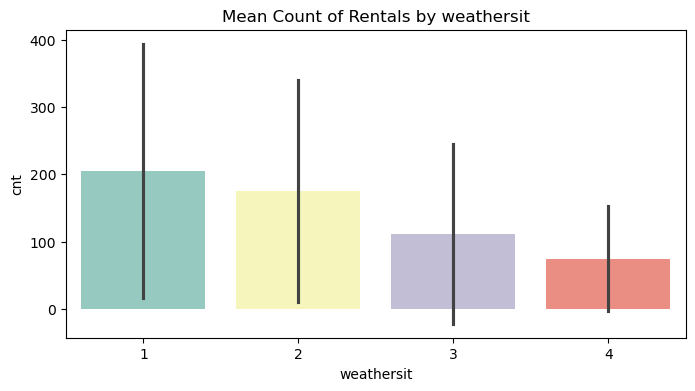

In [30]:
# Categorical vs Target (cnt)

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='cnt', data=df_clean, ci='sd', palette='Set3')
    plt.title(f'Mean Count of Rentals by {col}')
    plt.show()



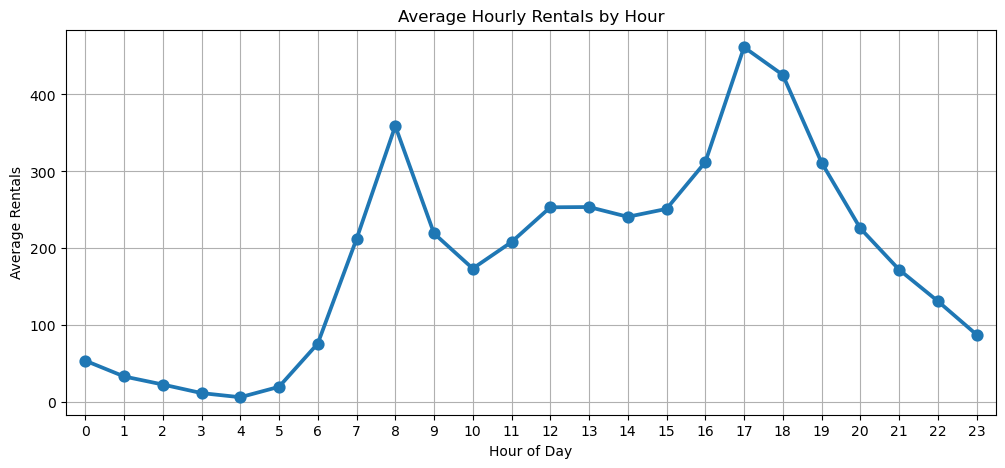

In [31]:
# (Extra) Hour vs Target (cnt)

plt.figure(figsize=(12, 5))
sns.pointplot(x='hr', y='cnt', data=df_clean, ci=None)
plt.title('Average Hourly Rentals by Hour')
plt.ylabel('Average Rentals')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.show()


#### Multivariate Analysis

**Correlation Heatmap**

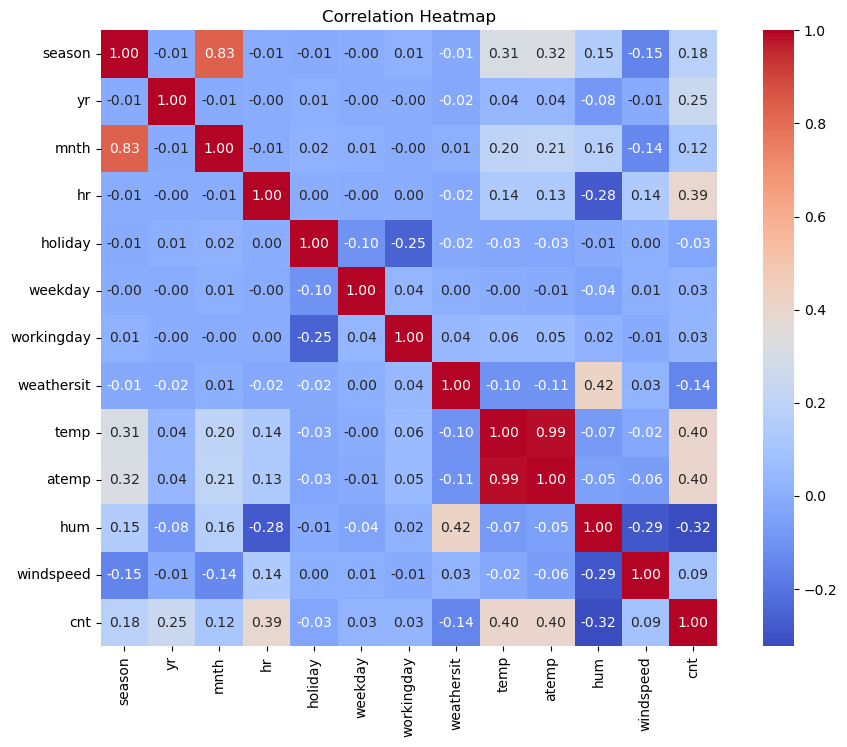

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


***Observation:***

* The hour of the day moderately influences the count (cnt).

* Higher temperatures are associated with higher bike rentals.

* Higher humidity tends to reduce the number of bike rentals.

* Strong correlation between temp and atemp, so we will drop atemp to avoid multicollinearity (Multicollinearity means that two or more features in a model are highly linearly related.)

In [ ]:
# But we will keep both as first we are using  regression algorithm

#### Pairplot of Numerical columns

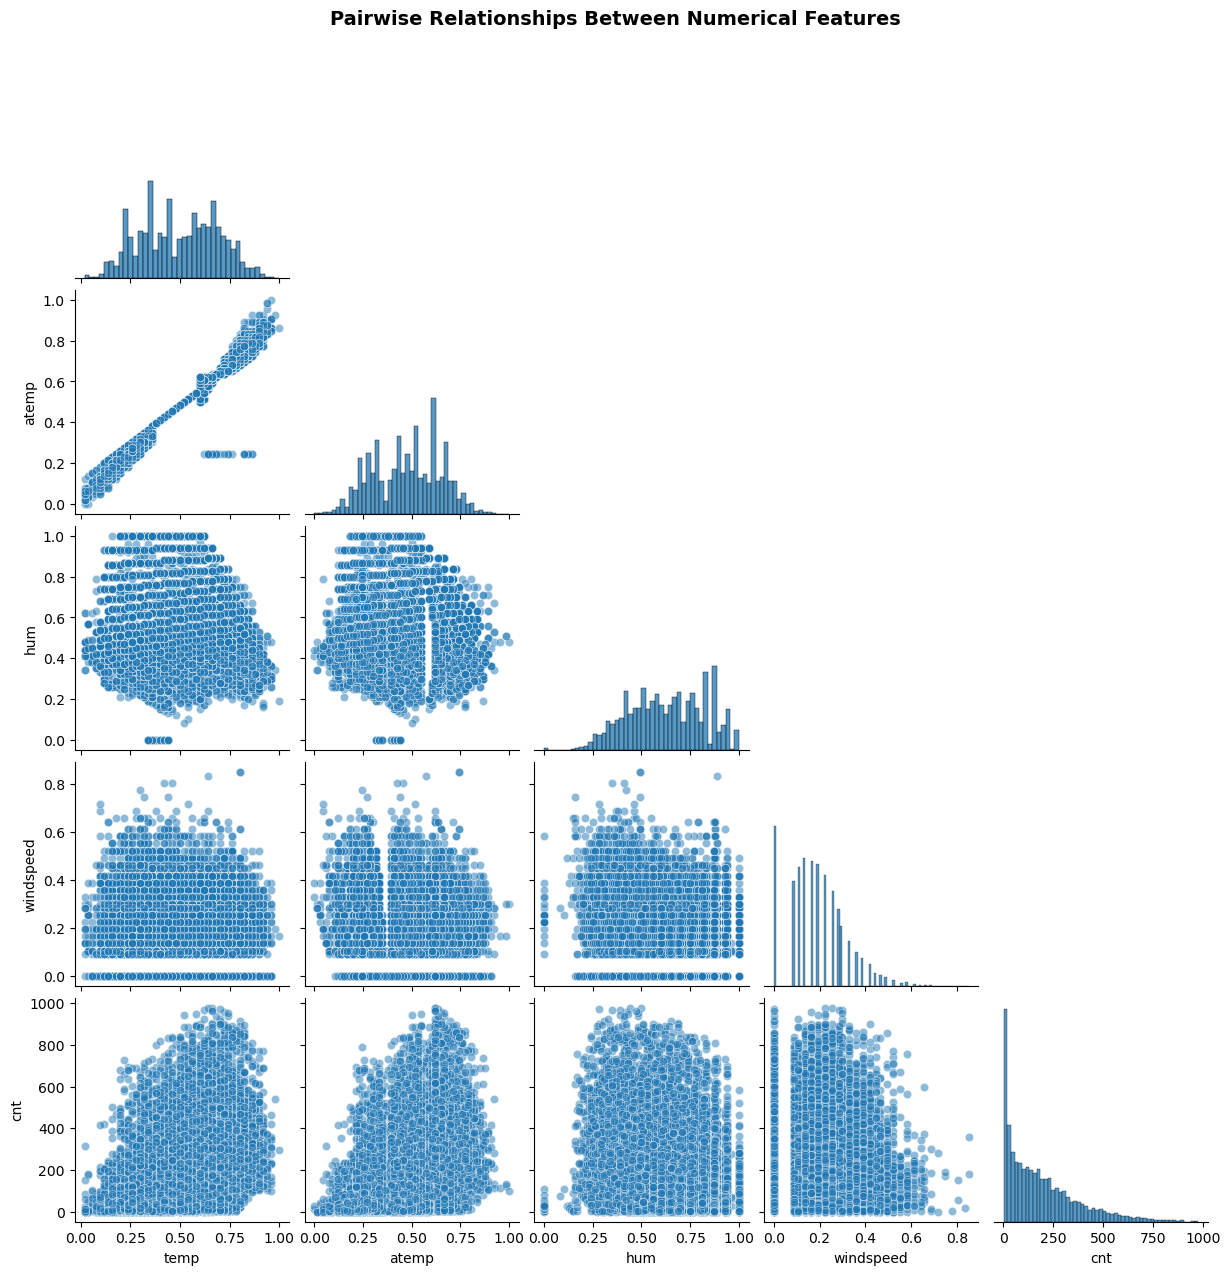

In [34]:
sns.pairplot(df_clean[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], corner=True, diag_kind='hist',plot_kws={'alpha': 0.5} )
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02, fontsize=14, fontweight='bold')
plt.show()


#### Pointplot ( hour vs cnt) by Working day 

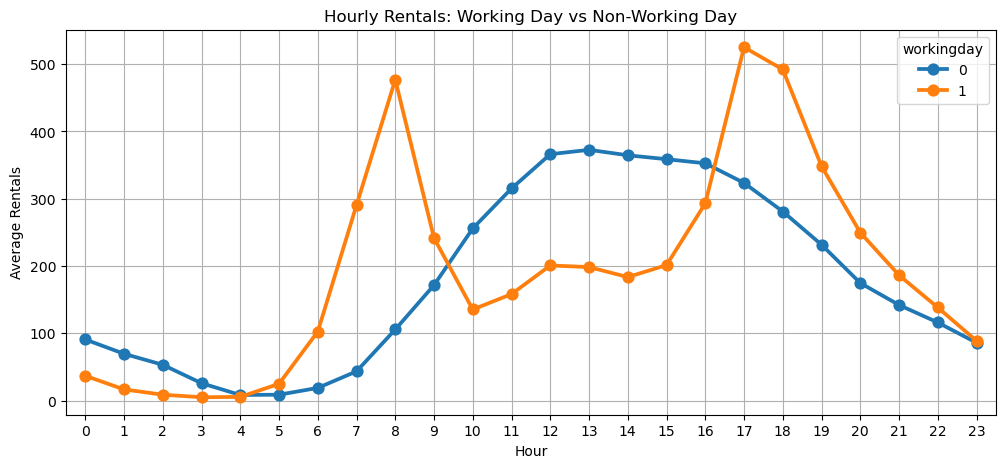

In [36]:
plt.figure(figsize=(12, 5))
sns.pointplot(x='hr', y='cnt', hue='workingday', data=df_clean, ci=None)
plt.title('Hourly Rentals: Working Day vs Non-Working Day')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.grid(True)
plt.show()


##### Observations:

* On working days, rentals peak at 8–9 AM & 5–6 PM.
* On non-working days, rentals are more spread out.



#### Month vs cnt by season

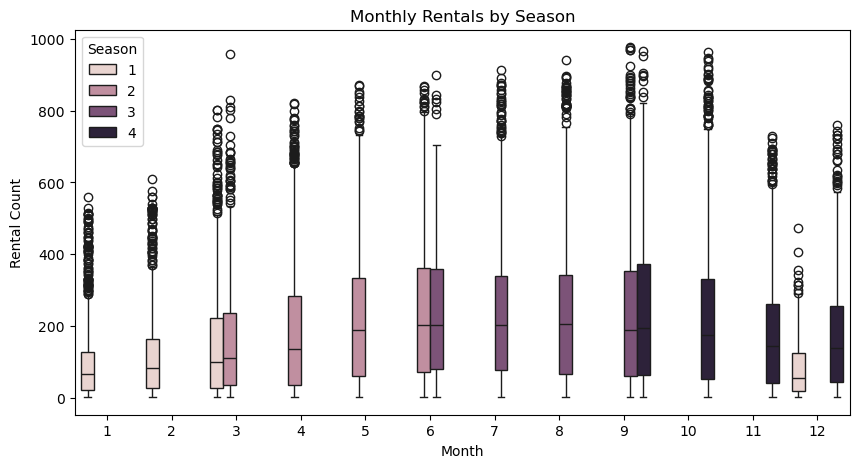

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='mnth', y='cnt', hue='season', data=df_clean)
plt.title('Monthly Rentals by Season')
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.legend(title="Season")
plt.show()


#### Handling the outliers

In [38]:
# Defining lower and upper bounds for 'cnt'
q_low = df_clean['cnt'].quantile(0.01)
q_hi = df_clean['cnt'].quantile(0.99)

# Filtering dataset without extreme outliers
df_no_outliers = df_clean[(df_clean['cnt'] >= q_low) & (df_clean['cnt'] <= q_hi)]

In [39]:
df_no_outliers

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [40]:
# Shapes comparison
print("Original dataset shape :", df_clean.shape)
print("Outlier-removed dataset shape :", df_no_outliers.shape)

Original dataset shape : (17377, 13)
Outlier-removed dataset shape : (17045, 13)


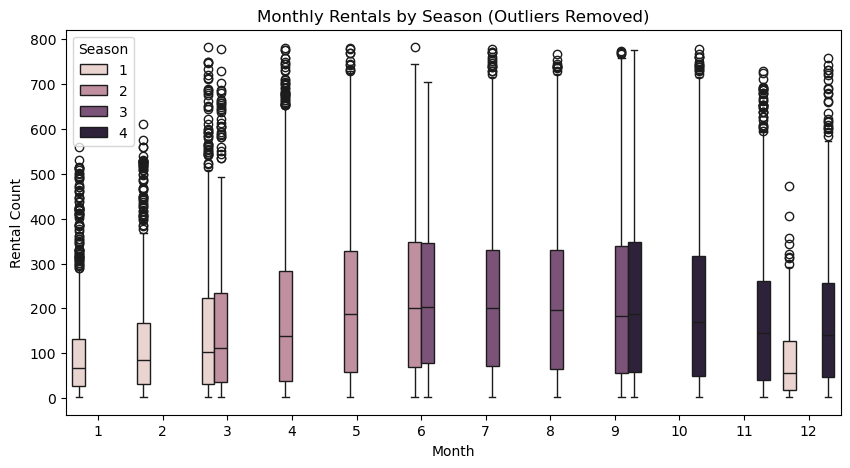

In [41]:
# After Outlier Removal
plt.figure(figsize=(10, 5))
sns.boxplot(x='mnth', y='cnt', hue='season', data=df_no_outliers)
plt.title('Monthly Rentals by Season (Outliers Removed)')
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.legend(title="Season")
plt.show()


#### Observation: 

* Although the dataset was filtered using the 1st–99th percentile to remove extreme outliers, the boxplot may still show dots outside the whiskers. This is because the boxplot uses the 1.5×IQR rule for detecting statistical outliers. The current cleaned dataset is still valid and ready for modeling.


In [42]:
# Full dataset (with outliers) - for tree-based models
df_full = df_clean.copy()

# Filtered dataset (outliers removed) - for linear models
df_filtered = df_no_outliers.copy()


In [43]:
# Categorical columns to encode
categorical_cols = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr']

# One-hot encoding
df_full_encoded = pd.get_dummies(df_full, columns=categorical_cols, drop_first=True)
df_filtered_encoded = pd.get_dummies(df_filtered, columns=categorical_cols, drop_first=True)


#### Separating Features and Target

In [44]:
# For full dataset (tree models)
X_full = df_full_encoded.drop('cnt', axis=1)
y_full = df_full_encoded['cnt']

# For filtered dataset (linear models)
X_filtered = df_filtered_encoded.drop('cnt', axis=1)
y_filtered = df_filtered_encoded['cnt']


#### Feature Scaling ( for linear model)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_filtered_scaled = scaler.fit_transform(X_filtered)


#### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

# For tree-based models
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# For linear models
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_filtered_scaled, y_filtered, test_size=0.2, random_state=42)


## Model Training & Evaluation

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Linear models (use on filtered + scaled data)
linear_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Tree-based models (use on full data)
tree_models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}


## Training and Evaluating Linear Models

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("------ Linear Models (Filtered & Scaled Data) ------\n")
for name, model in linear_models.items():
    model.fit(Xl_train, yl_train)
    y_pred = model.predict(Xl_test)
    
    print(f"{name}")
    print("R2 Score:", round(r2_score(yl_test, y_pred), 4))
    print("RMSE:", round(np.sqrt(mean_squared_error(yl_test, y_pred)), 4))
    print("-" * 40)


------ Linear Models (Filtered & Scaled Data) ------

Linear Regression
R2 Score: 0.6804
RMSE: 96.4668
----------------------------------------
Ridge Regression
R2 Score: 0.6804
RMSE: 96.4675
----------------------------------------
Lasso Regression
R2 Score: 0.6745
RMSE: 97.3552
----------------------------------------


#### Observations:

* Linear & Ridge Regression perform identically

* R2 score of 0.68 means the model explains 68% of the variance in rental count

* Lasso Regression performs slightly worse

* Lasso may have zeroed out some useful features (as it does feature selection)

## Training and Evaluating Tree based Models

In [49]:
print("\n------ Tree-Based Models (Full Data) ------\n")
for name, model in tree_models.items():
    model.fit(Xf_train, yf_train)
    y_pred = model.predict(Xf_test)
    
    print(f"{name}")
    print("R2 Score:", round(r2_score(yf_test, y_pred), 4))
    print("RMSE:", round(np.sqrt(mean_squared_error(yf_test, y_pred)), 4))
    print("-" * 40)



------ Tree-Based Models (Full Data) ------

Decision Tree
R2 Score: 0.8188
RMSE: 74.5926
----------------------------------------
Random Forest
R2 Score: 0.9129
RMSE: 51.7183
----------------------------------------


#### Observations:

* Random Forest is clearly the best performing model

* R² = 0.9129 explains over 91% of the variance in hourly rental count

* RMSE = 51.72 is the lowest error across all models

## Task 3: Model Comparison Report

The performance of all models was evaluated using **R² Score** (variance explained) and **Root Mean Squared Error (RMSE)** on the test set. Two datasets were used:

- **Filtered + Scaled Dataset** → For Linear Models (outliers removed, features scaled)
- **Full Dataset** → For Tree-Based Models (robust to outliers, no scaling needed)

---

### Evaluation Summary :
| Model               | R² Score | RMSE   | Dataset           |
|--------------------|----------|--------|-------------------|
| Linear Regression   | 0.6804   | 96.47  | Filtered + Scaled |
| Ridge Regression    | 0.6804   | 96.47  | Filtered + Scaled |
| Lasso Regression    | 0.6745   | 97.36  | Filtered + Scaled |
| Decision Tree       | 0.8188   | 74.59  | Full              |
| ✅ Random Forest     | ✅ **0.9129** | ✅ **51.72** | Full              |



#### Feature Importance from Random Forest

In [50]:
model = RandomForestRegressor(random_state=42)
model.fit(Xf_train, yf_train)


RandomForestRegressor(random_state=42)

#### Extracting and Sorting Feature Importances

In [51]:
# Create a DataFrame of features and their importances
importances = pd.DataFrame({
    'Feature': X_full.columns,
    'Importance': model.feature_importances_
})

# Sort by importance
importances_sorted = importances.sort_values(by='Importance', ascending=False)

# Show top 10 features
importances_sorted.head(10)


,Feature,Importance
1,atemp,0.162997
48,workingday_1,0.094848
34,hr_17,0.093324
2,hum,0.081308
35,hr_18,0.079357
52,yr_1,0.078473
25,hr_8,0.062341
0,temp,0.058153
36,hr_19,0.029214
24,hr_7,0.017034


#### Plotting Feature Importances

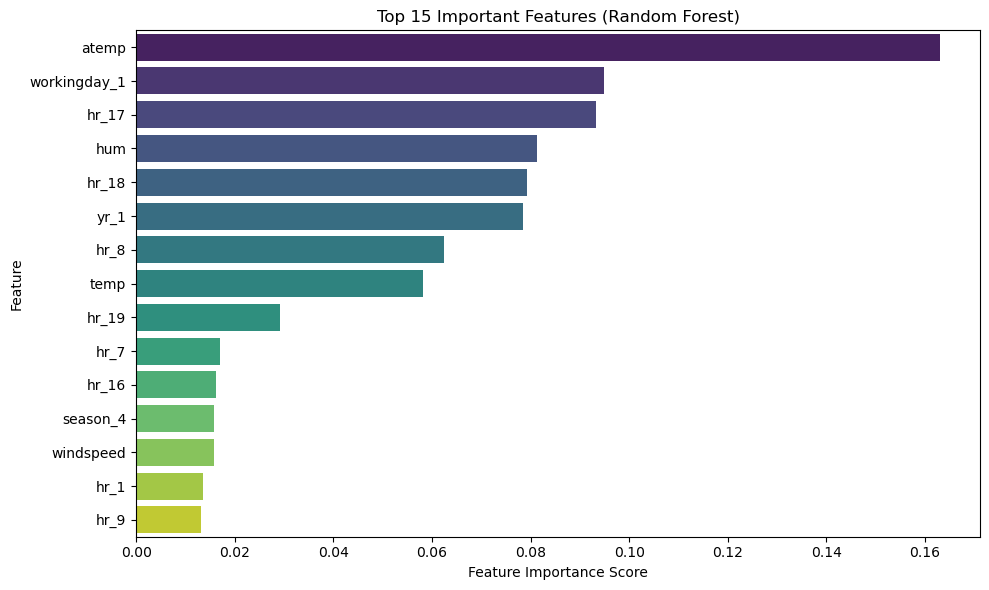

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_sorted.head(15), palette='viridis')
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### Observations:

- **Random Forest Regressor** outperformed all other models with the highest R² score and the lowest RMSE.
- The Random Forest model identified `atemp` (feels-like temperature) as the most significant factor influencing bike rental counts.
- Hour-specific features (`hr_17`, `hr_18`, `hr_8`) appeared prominently, aligning with commuter behavior patterns.
- `workingday`, `humidity`, and actual `temp` were also major contributors.
- Time-based signals such as `year`, `season`, and individual hours clearly influence user behavior.
- These results validate earlier insights from EDA and support the model’s interpretability for business decisions.


## Task 4 : Challenges Faced & Techniques Used (Report Summary)



### 1. Data Understanding and Cleaning
- The dataset `hour.csv` included temporal, environmental, and categorical variables.
- Columns like `instant`, `dteday`, `casual`, and `registered` were removed as they were either identifiers or leaked target information.
- Data was verified to have no missing values.
- Duplicate entries were checked and none were found.

**Challenges Faced:**
- Identifying unnecessary or leakage-prone features
- Verifying dataset quality (nulls, duplicates)

**Techniques Used:**
- `.info()`, `.describe()`, `.isnull().sum()` for data inspection
- Dropped `instant`, `dteday`, `casual`, and `registered` to prevent data leakage
- Used `df.duplicated().sum()` to confirm no duplicate records

---

### 2. Outlier Detection and Handling
- The `cnt` (rental count) column had extreme outliers.
- These were removed using the 1st and 99th percentile method, improving the performance of sensitive models like Linear Regression.
- Two versions of the dataset were maintained:
  - **Original (with outliers)** for robust models like Decision Tree and Random Forest.
  - **Filtered (without outliers)** for models like Linear, Ridge, and Lasso Regression.

**Challenges:**
- Outliers in target (`cnt`) distort model training, especially for linear models

---

### 3. Exploratory Data Analysis (EDA)
- Extensive EDA was performed:
  - Univariate analysis using histograms and countplots.
  - Bivariate analysis using boxplots and pointplots across time, weather, and day types.
  - Multivariate analysis using heatmaps, pairplots, and hour-weekday interaction.
- Key insights included:
  - Rentals peak during commuting hours.
  - Temperature and humidity significantly impact rental demand.
  - Working day and seasonality affect usage patterns.

**Challenges:**
- Understanding patterns across time, weather, and calendar features

---

### 4. Feature Engineering and Preprocessing
- Categorical variables were encoded using one-hot encoding.
- Feature scaling (StandardScaler) was applied to the filtered dataset for linear models.
- No scaling was applied to tree-based models as they are insensitive to feature magnitude.

**Challenges:**
- Preparing categorical and numerical features for different types of models

---

### 5. Model Building and Comparison
- Multiple algorithms were tested:
  - **Linear Regression / Ridge / Lasso** on filtered (scaled) data.
  - **Decision Tree / Random Forest** on full dataset.
- Evaluation was done using **R² Score** and **RMSE**.
- Results:
  - Linear models performed moderately well (R² ≈ 0.68).
  - Random Forest achieved the best performance with **R² = 0.9129** and **RMSE = 51.72**.

**Challenges:**
- Selecting models that suit data characteristics
- Evaluating models using consistent metrics

**Techniques Used:**
- **Train-Test Split** using `train_test_split()`
- Trained multiple regression models:
  - Linear Regression, Ridge, Lasso on filtered + scaled data
  - Decision Tree, Random Forest on full data

---

### 6. Feature Importance Insights
- Feature importances were extracted from Random Forest.
- Top contributors: `atemp`, `workingday`, key `hr` values, and `hum`.
- This validated earlier EDA findings and supported business interpretation.

**Challenges:**
- Understanding what features drive the model’s predictions


---

## Conclusion
- The dataset contained nonlinear trends best captured by ensemble models.
- **Random Forest Regressor** was chosen as the final model for deployment due to its superior accuracy, robustness, and interpretability.


#### Saving and Loading the model

In [57]:
import pickle

# Save the trained Random Forest model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Random Forest model saved successfully!")


Random Forest model saved successfully!


In [58]:
# Loading the pickled model

import pickle

# Load the saved Random Forest model from the .pkl file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [59]:
# Making predictions using the loaded model

# Predicting on test data
y_pred_loaded = loaded_model.predict(Xf_test)

# Taking first 5 predictions
print("Sample predictions from loaded model:", y_pred_loaded[:5])


Sample predictions from loaded model: [328.76 809.74 117.65 568.6   31.74]



* The trained Random Forest model was saved using `pickle` and successfully reloaded to make predictions.

* This demonstrates a production-ready pipeline, where the model can be deployed for real-time predictions without retraining.

**Sample Predictions:**
328.76, 809.74, 117.65, 568.6, 31.74
